In [1]:
# Question 1 part (a)
from sklearn.model_selection import train_test_split
import numpy as np

filename = 're_dat.csv'
data = np.genfromtxt(filename, delimiter=',')

X = np.reshape(data[:, 0], (-1, 1))
y = data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

print(f'{X_train.shape = }')
print(f'{y_train.shape = }')
print(f'{X_test.shape = }')
print(f'{y_test.shape = }')

X_train.shape = (180, 1)
y_train.shape = (180,)
X_test.shape = (20, 1)
y_test.shape = (20,)


In [2]:
# Question 1 part (b)
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def get_pf(n: int) -> PolynomialFeatures:
    return PolynomialFeatures(degree=n, include_bias=False)

best_acc = 0
best_deg = 0

for i in range(2, 16):
    pf = get_pf(i)
    _X = pf.fit_transform(X_train)
    model = LinearRegression()
    acc = np.mean(cross_val_score(model, _X, y_train))
    if acc > best_acc:
        best_acc = acc
        best_deg = i

print(f'Best Accuracy achieved: {best_acc:.3f} at degree {best_deg}')

Best Accuracy achieved: 0.906 at degree 13


In [3]:
# Question 1 part(c)

pf = get_pf(i)
_X = pf.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(f'{score = :.3f}')

score = 0.744


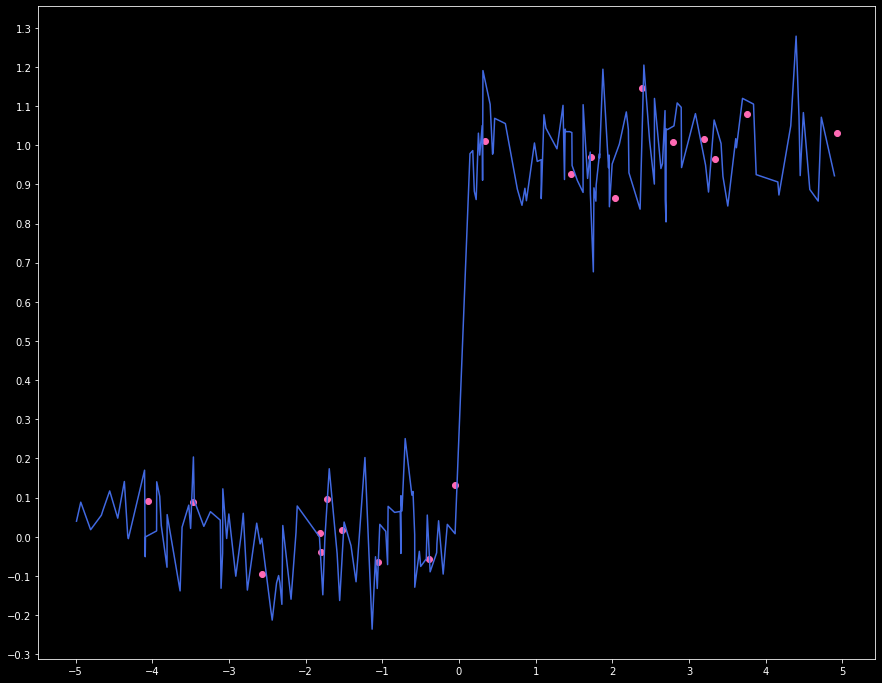

In [4]:
# Question 1 part (c) continued 
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('dark_background')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 12))

idx = np.argsort(X_train.flatten())
X1 = X_train[idx].flatten()
y1 = y_train[idx]

idx = np.argsort(X_test.flatten())
X2 = X_test[idx].flatten()
y2 = y_test[idx]

ax.plot(X1, y1, c='royalblue')
ax.scatter(X2, y2, c='hotpink')
ax.set_xticks(np.arange(-5, 5.01, 1))
ax.set_yticks(
    np.arange(
        np.around(np.min(y), 1) - 0.1,
        np.around(np.max(y), 1) + 0.1,
        0.1
    )
)

plt.show()

In [5]:
# Question 2 part (a)

def sigmoid(X: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-X))

def tanh(X: np.ndarray) -> np.ndarray:
    return np.tanh(X)

def relu(X: np.ndarray) -> np.ndarray:
    X = np.copy(X)
    X[X < 0] = 0
    return X

def threshold(X: np.ndarray) -> np.ndarray:
    return (X > 0).astype(float)

X = np.array([
    [0.84,  0.81,  0.92,  0.19,  0.61,  0.35,  0.58,  0.91,  0.75,  0.38,],
    [0.25,  0.24,  0.34,  0.25,  0.47,  0.83,  0.54,  0.28,  0.75,  0.56,],
]).T
y = np.array(
    [1, 1, 1, 0, 0, 0, 0, 1, 0, 0,]
)

weights = np.array([10, -11.25]).reshape((-1, 1))
bias = -1

print(f'{X.shape = }')
print(f'{y.shape = }')
print(f'{weights.shape = }')

X.shape = (10, 2)
y.shape = (10,)
weights.shape = (2, 1)


In [6]:
# Question 2 part (a) continued

weighted = X @ weights + bias
weighted = np.around(weighted.flatten(), 3)
print(f'weighted = {weighted}')

weighted = [ 4.588  4.4    4.375 -1.912 -0.188 -6.838 -1.275  4.95  -1.938 -3.5  ]


In [7]:
z = np.around(sigmoid(weighted), 3)
print(f'Sigmoid activated output\n{z.flatten()}')

z = np.around(tanh(weighted), 3)
print(f'\nHyperbolic tangent activated output\n{z.flatten()}')

z = relu(weighted)
print(f'\nReLU activated output=\n{z.flatten()}')

z = threshold(weighted)
print(f'\nThreshold activated output=\n{z.flatten()}')

Sigmoid activated output
[0.99  0.988 0.988 0.129 0.453 0.001 0.218 0.993 0.126 0.029]

Hyperbolic tangent activated output
[ 1.     1.     1.    -0.957 -0.186 -1.    -0.855  1.    -0.959 -0.998]

ReLU activated output=
[4.588 4.4   4.375 0.    0.    0.    0.    4.95  0.    0.   ]

Threshold activated output=
[1. 1. 1. 0. 0. 0. 0. 1. 0. 0.]


In [8]:
# Question 2 part (b)

bias = 0.1
weights = np.array([[0.2, -0.3]]).T

weighted = X @ weights + bias

z = np.around(sigmoid(weighted), 3).flatten()
print(f'Sigmoid Activated\n{z}')

Iw = 0.5 * (z - y) ** 2
Iw = np.around(Iw, 3)
print(f'\nI(w)\n{Iw}')

e = z - y
p = z * (1 - z)
dIw = (X.T @ (e * p)) / len(X)
dIw = np.around(dIw, 3)
print(f'\ndI(w) = {dIw}')

Sigmoid Activated
[0.548 0.547 0.545 0.516 0.52  0.48  0.513 0.549 0.506 0.502]

I(w)
[0.102 0.103 0.104 0.133 0.135 0.115 0.132 0.102 0.128 0.126]

dI(w) = [-0.003  0.03 ]


In [9]:
# Question 2 part (c)

learning_rate = 0.5
Xk = np.array([[0.19, 0.25]])
target = np.array([[0]])

predicted = Xk @ weights

w_k1 = weights + learning_rate * (Xk.T @ (target - predicted))
w_k1 = np.around(w_k1.flatten(), 3)
print(f'w(k+1) = {w_k1}')

w(k+1) = [ 0.204 -0.295]
